### <span style='color:grey'>Objective</span>
In that notebook I will explain all building block of convolutional neural networks and how to combine to work on your problem
but first let's import the data and process it for the our networks


# <b>1 <span style='color:#c72b2ed4'>|</span> Importing Data</b>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import os
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #for ignore tensorflow warings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
train_data =pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X_test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [3]:
y_train_all = train_data.pop('label')
X_train_all = train_data.copy()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all , y_train_all , test_size=0.1 , random_state=40 )

In [5]:
import tensorflow as tf 
from tensorflow import keras
IMG_SIZE= 28
X_train = X_train /255.0
X_valid = X_valid /255.0

y_train = y_train.values
y_valid = y_valid.values

X_train = X_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_valid = X_valid.values.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


# <b>2 <span style='color:#c72b2ed4'>|</span> Optimizer</b>


#### We all use adam ,but why adam?

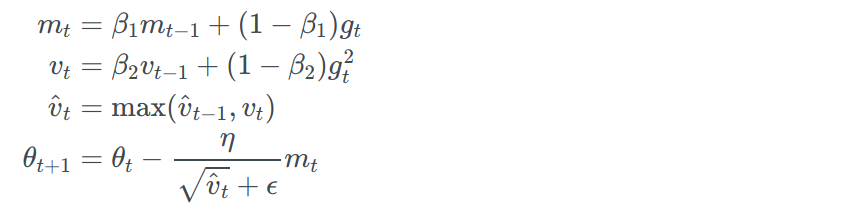

we all know that to converge faster it's better to take a large learning rate at the beginning of training and by time decreasing that rate and that what $B2$ 
-  if you set  $B2$  to 0.99 , that means take 99% form the previous learing_rate and 1% from the new derivative

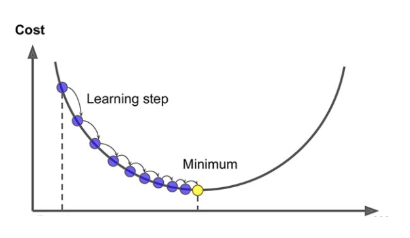

and it would be better to smooth out steps instead of taking sharp steps that are controlling by $B1$ , for example
-  if you set  $B1$  to 0.9 , that means take 90% form the previous weight and 10% from the new derivative

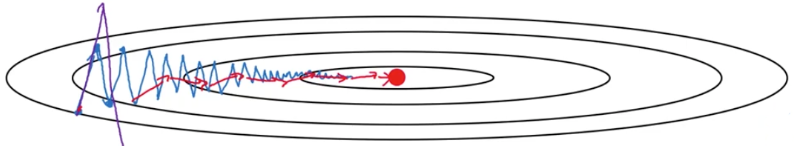


In [6]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3 , beta_1=0.9 , beta_2=0.999)

# <b>3 <span style='color:#c72b2ed4'>|</span> Explain block of convolutional neural networks </b>

## 1 - filter 
but what is filter ?
let's take a basic exmple 

#### intuition about filters

In [7]:
X = np.array([1,2,3,4,5,6])

that is basic list let's say you want the numbers that is greater than 3 

In [8]:
X[X>3]

what you have just done is that you filtered(<b> get what you are looking for </b>) the array, the same idea for the image you have some filters, and these filters is looking for something me and you don't know what they are looking for , but will learn it during backprop.


okay that is nice ? till now i understand that have something called filters is passing throw image searching for something in image




#### what are really filter ?

- As I said the values of the filter are first random initialized and then learnt during backprop 
- the higher values at the output (<b>feature map</b>) means the filter found what it is looking for

## 2 - Pooling Layers 
but what is Pooling Layers  ?

we know that the reason we invented the CNN because the computaional cost of DNN dealing with images , so the mean purpose of CNN to reduce the computaion cost as much as possible with keeping the accuracy , so Their goal is to subsample (shrink) the input image in order to reduce 
- the computational load
- memory usage
- the number of parameters



Okay i will walk with you how to shrink it ?
well,we have two ways
- max (preserves only the strongest features, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work with. Moreover)(most famous)
- mean ( computing the mean generally loses less information than computing the max)



#### Dose the pooling layer affect the accuracy ?
as you can see that we are loosing information in max pooling, but it looks like max pooling keeps the most important information that can be used to build a strong multi-layer full connected network at the end,please do not take my answer as an ultimate truth, I just wanted to share my concerns and thoughts about this based on one of the experiments I did before

# <b>4 <span style='color:#c72b2ed4'>|</span> Building block of convolutional neural networks </b>

Now you know all the building blocks to create convolutional neural networks , you now know how to hold Fork and knife but we need to learn how to cut using them let's start 
## 1-  Typical CNN architectures
stack a few convolutional layers (each one generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e.,with more feature maps)
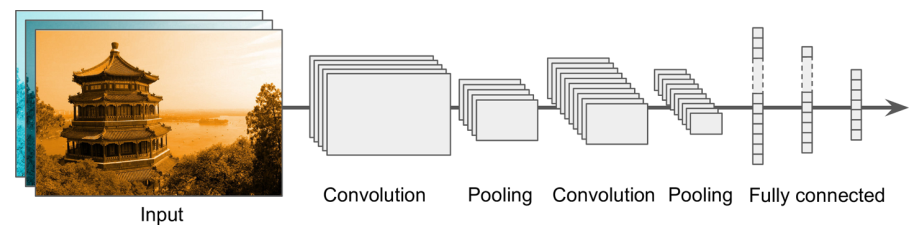
#### Notes 
- instead of using a convolutional layer with a 5 × 5 kernel, stack two layers with 3 × 3 kernels : it will use fewer parame‐ters and require fewer computations, and it will usually performbetter. One exception is for the first convolutional layer: it can typically have a large kerne
-  usually with a stride of 2 
- same means adding padding of zeros that the output size is the same as the input size
- sparse_categorical_crossentropy if the label is integars
- dropout(the persent of neurons being drop of the next layer) 
-  the number of filters grows as we climb up the CNN toward the output layer ,it makes sense for it to grow, since the number of low-level features is often fairly low (e.g., small circles, horizontallines), but there are many different ways to combine them into higher-level features

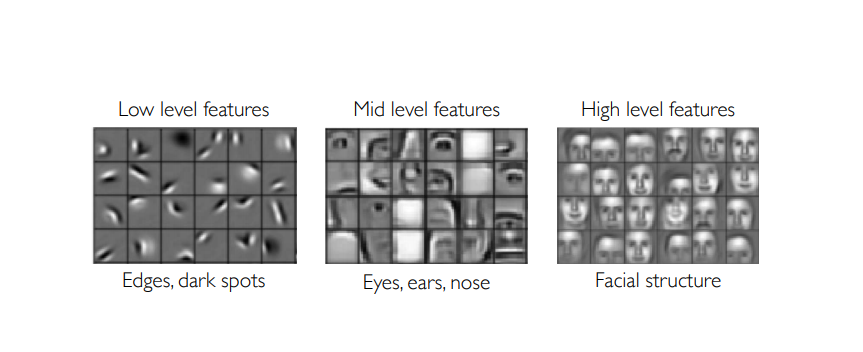

-  we must flatten its inputs, since a dense network expects a 1D array of features for each instance.

In [9]:
Typical_model = keras.models.Sequential([
            keras.layers.Conv2D(64, 7, activation="relu", padding="same", kernel_initializer="he_normal",
            input_shape=[28, 28, 1]),
            keras.layers.MaxPooling2D(2),
            keras.layers.Conv2D(128, 3, activation="relu", padding="same", kernel_initializer="he_normal"),
            keras.layers.Conv2D(128, 3, activation="relu", padding="same", kernel_initializer="he_normal"),
            keras.layers.MaxPooling2D(2),
            keras.layers.Conv2D(256, 3, activation="relu", padding="same", kernel_initializer="he_normal"),
            keras.layers.Conv2D(256, 3, activation="relu", padding="same", kernel_initializer="he_normal"),
            keras.layers.MaxPooling2D(2),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation="softmax")
])
Typical_model.compile(loss ='sparse_categorical_crossentropy', optimizer = opt , metrics = ['accuracy'])

Typical_model.fit(X_train , y_train ,validation_data=(X_valid , y_valid) , epochs=30 , verbose=2 )


 This CNN <b> (which  take the style of VGG that why i won't explain it again) </b> reaches over 99% accuracy on the validation ,Looking at the evolution of the winning entries is a good way to understand how CNNs work. We will first look at the classical <b> LeNet-5 architecture (1998)</b>, then three of the winners of the ILSVRC challenge: <b> AlexNet (2012) </b>, <b> GoogLeNet (2014) </b>, and<b> ResNet(2015) </b>

## 2- LeNet-5 architecture
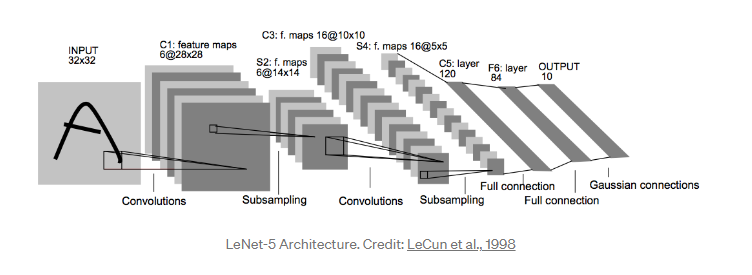

In [10]:
LeNet_model = keras.models.Sequential([
            keras.layers.Conv2D(6, 5, activation="tanh", padding="same", strides = 1,input_shape=[28, 28, 1]),
            keras.layers.AveragePooling2D(2 , strides=(2)),
    
            keras.layers.Conv2D(16, 5, activation="tanh", padding="valid" ,strides = 1),
            keras.layers.AveragePooling2D(2,strides=(2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(120, activation="tanh"),
            keras.layers.Dense(84, activation="tanh"),
            keras.layers.Dense(10, activation="softmax")
])
LeNet_model.compile(loss ='sparse_categorical_crossentropy', optimizer = opt , metrics = ['accuracy'])

LeNet_model.fit(X_train , y_train ,validation_data=(X_valid , y_valid) , epochs=30 , verbose=2 )


 it seems that we have overfitting let's help that old architecture 

In [11]:
LeNet_model = keras.models.Sequential([
            keras.layers.Conv2D(6, 5, activation="tanh", padding="same", strides = 1,input_shape=[28, 28, 1]),
            keras.layers.AveragePooling2D(2 , strides=(2)),
    
            keras.layers.Conv2D(16, 5, activation="tanh", padding="valid" ,strides = 1),
            keras.layers.AveragePooling2D(2,strides=(2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(120, activation="tanh"),
            keras.layers.Dropout(0.5), #add that to reduce overfitting
            keras.layers.Dense(84, activation="tanh"),
            keras.layers.Dropout(0.5), #add that to reduce overfitting
            keras.layers.Dense(10, activation="softmax")
])
LeNet_model.compile(loss ='sparse_categorical_crossentropy', optimizer = opt , metrics = ['accuracy'])

LeNet_model.fit(X_train , y_train ,validation_data=(X_valid , y_valid) , epochs=30 , verbose=2 )


Yann LeCun’s website features great demos of LeNet-5 classifying digits http://yann.lecun.com/exdb/lenet/index.html

## 3-AlexNet architecture
It is similar to LeNet-5, <b> only much larger and deeper </b>, and it was the
first to stack convolutional layers directly on top of one another, instead of stacking a
pooling layer on top of each convolutional layer.
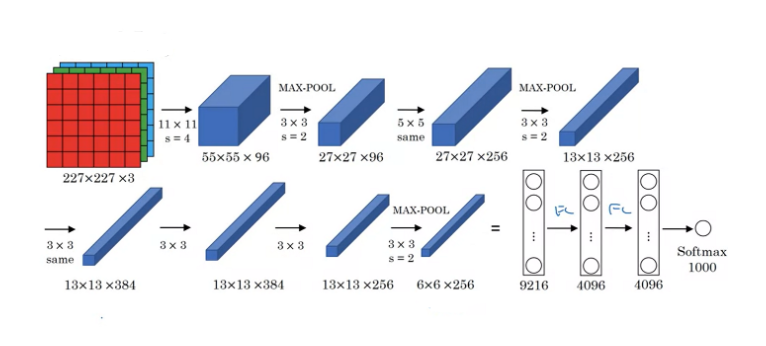

#### Notes : that architecture was trainded on 227X227 and my data is just 28X28 so 
- i use the padding = same ,if i used valid the data will vanish
- i divided all the filter numbers by 4 
- as your network get bigger the chance of overfitting is increasing just like we have here , we used one regularization technique <b> Dropout </b>,i would use another one called <b> data augmentation </b> which basically shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions

In [12]:
AlexNet_model = keras.models.Sequential([
            keras.layers.Conv2D(24, 11, activation="relu",  strides = 4  ,kernel_initializer="he_normal",input_shape=[28, 28, 1]),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D(3 , strides = 2 , padding="same"),
    
            keras.layers.Conv2D(64, 5, activation="relu", strides= 1,padding="same", kernel_initializer="he_normal"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D(3 , strides = 2 , padding="same" ),
    
            keras.layers.Conv2D(96, 3, activation="relu", padding="same", kernel_initializer="he_normal"),
            keras.layers.Conv2D(96, 3, activation="relu", padding="same", kernel_initializer="he_normal"),
            keras.layers.Conv2D(64, 3, activation="relu", padding="same", kernel_initializer="he_normal"),

            keras.layers.MaxPooling2D(3 , strides = 2 , padding="same"),
            keras.layers.Flatten(),
            keras.layers.Dense(1024, activation="relu", kernel_initializer="he_normal"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1024, activation="relu", kernel_initializer="he_normal"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation="softmax")
])
AlexNet_model.compile(loss ='sparse_categorical_crossentropy', optimizer = opt , metrics = ['accuracy'])

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
)
datagen.fit(X_train)
AlexNet_model.fit_generator(datagen.flow(X_train,y_train), validation_data = (X_valid,y_valid),
                           epochs = 30 , verbose = 2  )

## 4- GoogLeNet architecture
the main idea of that architecture is that it's using what is called <b> inception_block </b> , so what is that inception block ? and what it dose?
- First : allow GoogLeNet to use parameters much more efficiently than previous architectures , GoogLeNet actually has 10 times fewer parameters than AlexNet (roughly 6 million instead of 60 million).
- Second :You may wonder why inception modules have convolutional layers with 1 × 1 kernels ?

  1- They are configured to output fewer feature maps than their inputs (This cuts the computa CNN Architectures  cost and the number of parameters, speeding up training and improving generalization
  
  2- Each pair of convolutional layers cts like a single powerful convolutional layer, capable of capturing more complex patterns

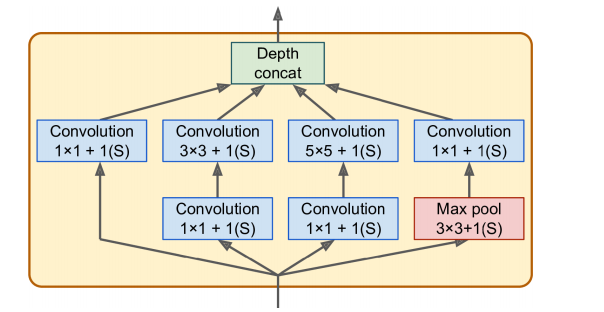

In [13]:
def inception_block(layer_in ,f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    conv1=keras.layers.Conv2D(f1, (1,1), activation="relu",padding="same")(layer_in)
    
    conv3=keras.layers.Conv2D(f2_in, (1,1), activation="relu",padding="same")(layer_in)
    conv3=keras.layers.Conv2D(f2_out,  (3,3), activation="relu",padding="same")(conv3)
    
    conv5=keras.layers.Conv2D(f3_in, (1,1), activation="relu",padding="same")(layer_in)
    conv5=keras.layers.Conv2D(f3_out, (5,5), activation="relu",padding="same")(conv5)
    
    pool = keras.layers.MaxPooling2D((3,3) , (1,1) , padding="same" )(layer_in)
    pool=keras.layers.Conv2D(f4_out, (1,1), activation="relu", padding="same")(pool)
    

    
    layer_out = keras.layers.concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out
    

Now let’s look at the architecture of the GoogLeNet CNN

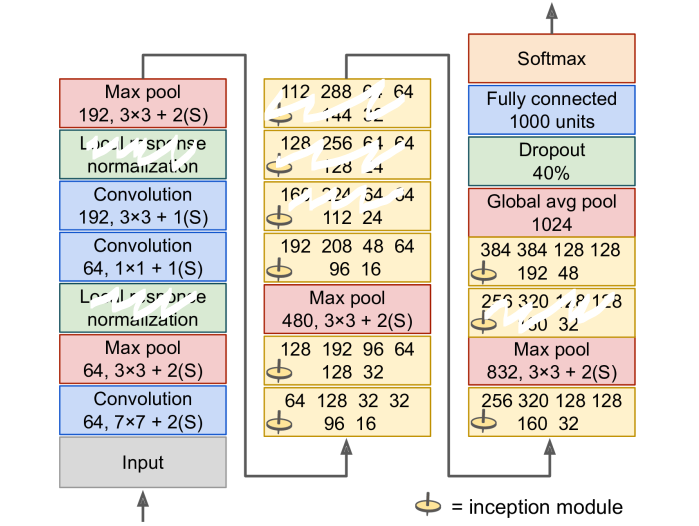

#### Notes :
-  I took a small version , you don't have to implement the whole network just understand how it's working 
-  I used BatchNormalization instead of local response normalization (more effective)\


In [14]:
input_ = keras.layers.Input(shape=[28, 28, 1] )
conv1  = keras.layers.Conv2D(16, 7, activation="relu",  padding="same" ,kernel_initializer="he_normal")(input_)
pool1  = keras.layers.MaxPooling2D(3 ,  padding="same")(conv1)

batch1 = keras.layers.BatchNormalization()(pool1)
    
conv2 = keras.layers.Conv2D(16, 1, activation="relu",padding="same", kernel_initializer="he_normal")(batch1)
conv3 = keras.layers.Conv2D(48, 3, activation="relu", padding="same", kernel_initializer="he_normal")(conv2)

batch2 = keras.layers.BatchNormalization()(conv3)


pool2 = keras.layers.MaxPooling2D(3 , padding="same" )(batch2)
block1 = inception_block(pool2,16 , 32 ,8 , 8 , 24 ,4 )
block2 = inception_block(block1,32 , 48 ,24 , 16 , 32 ,8 )


pool3=keras.layers.MaxPooling2D(3 ,  padding="same")(block2)

block3 = inception_block(pool3,48 ,52 ,12 , 16 , 24 ,4 )
block4 = inception_block(block3,64 ,80 ,32 , 32 , 40 ,8)


pool4=keras.layers.MaxPooling2D(3 , padding="same")(block4)

block5 = inception_block(pool4,96 ,96 ,32 , 32 , 48 ,12)

pool5=keras.layers.AvgPool2D(3 , padding="same")(block5)


flat1 = keras.layers.Flatten()(pool5)

dense1 = keras.layers.Dense(1024, activation="relu", kernel_initializer="he_normal")(flat1)
drop1= keras.layers.Dropout(0.4)(dense1)



output = keras.layers.Dense(10,activation = 'softmax')(drop1)
GoogLeNet = keras.Model(inputs =[input_] , outputs = [output])

GoogLeNet.compile(loss ='sparse_categorical_crossentropy', optimizer = opt , metrics = ['accuracy'])

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
)
datagen.fit(X_train)
GoogLeNet.fit_generator(datagen.flow(X_train,y_train), validation_data = (X_valid,y_valid),
                           epochs = 30 , verbose = 2 )

## 5- ResNet architecture
It confirmed the general trend: models are getting deeper and deeper, with fewer and fewer parameters.The key to being able to train such a deep
network is to use <b> skip connections </b> (also called <b> shortcut connections </b> )
so what is the shortcut connection ?

![image.png](attachment:bc1b1343-2b17-474e-a03b-5ba50aec27dd.png)

okay , looking nice but the is the purpose of that ?
as you know when we have a deep neural network that increase the probability have casing vanishing or exploding gradient and now we need to go deep how to solve that?
- you might say , hay use initializer (used)
- okay what about BatchNormalization (used)
- we need something that is more strong and repeated , that is why they invented <b> skip conncetion</b> basically it controls the the weight form exploding or vanishing by take pices of the new weight and old weight so that is case of something went wrong , don't worry the skipped one will handel it




let's build that residual units

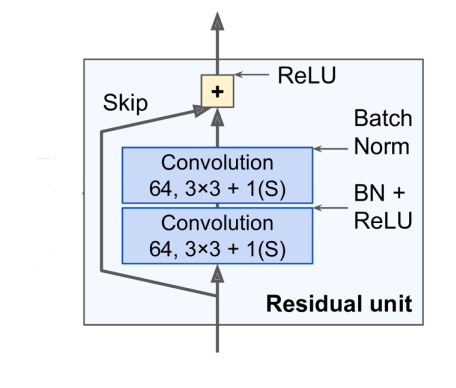

In [15]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self , filters , strides=1  , activation = 'relu' , **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters , 3 , strides=strides , padding = 'same',kernel_initializer="he_normal"),#i did not use the actiavtion here as you see is the above photo he used the batchnormalise first then the activation
            keras.layers.BatchNormalization(),
            self.activation ,
            keras.layers.Conv2D(filters, 3 , strides=strides ,padding="same",kernel_initializer="he_normal"),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        #that is the case of the stride is two , we can not add the input directly to the input because they don't have the same shape ,to solve that the input are passed through 1X1 conv2D with stried = 2
        if strides > 1:
            self.skip_layers = [
                        keras.layers.Conv2D(filters, 1, strides=strides,padding="same", kernel_initializer="he_normal"),
                        keras.layers.BatchNormalization()
            ]
        def call(self , inputs):
            Z = inputs
            for layer in self.main_layers :
                Z = layer(Z)
            skip_Z = inputs
            for layer in skip_layers:
                skip_Z = layer(skip_Z)
            return self.activation(Z + skip_Z)

Now let’s look at the architecture of the ResNet architecture

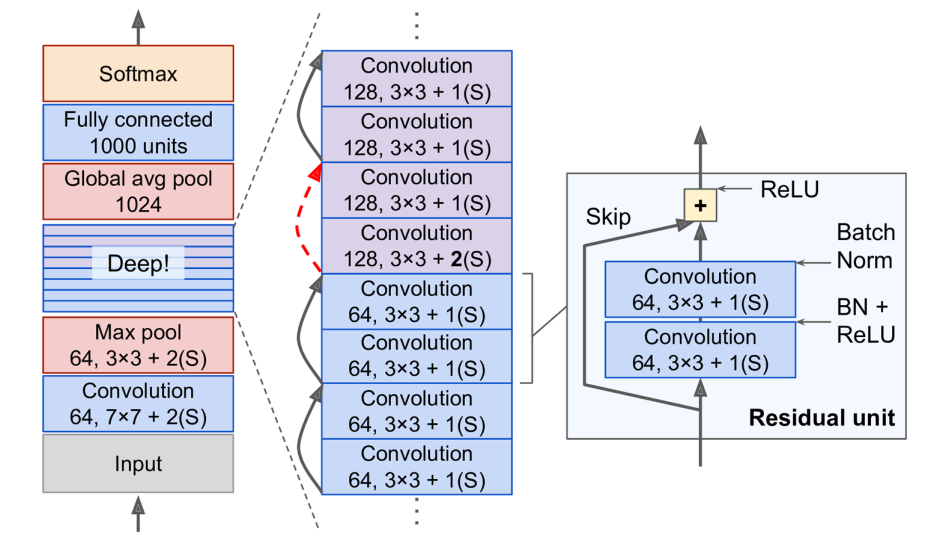


In [16]:
ResNet_model = keras.models.Sequential([
            keras.layers.Conv2D(64, 72, activation="relu",  strides = 4 ,padding="same" ,kernel_initializer="he_normal",input_shape=[28, 28, 1]),
            keras.layers.MaxPooling2D(3 , strides = 2 , padding="same"),
            ResidualUnit(64 , 1 , 'relu'),
            ResidualUnit(64 , 1 , 'relu'),
            ResidualUnit(128 , 2 , 'relu'),
            ResidualUnit(128 , 1 , 'relu'),
            keras.layers.AvgPool2D(3 , padding="same"),
            keras.layers.Flatten(),
            keras.layers.Dense(1024, activation="relu", kernel_initializer="he_normal"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation="softmax")
])
ResNet_model.compile(loss ='sparse_categorical_crossentropy', optimizer = opt , metrics = ['accuracy'])

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
)
datagen.fit(X_train)
ResNet_model.fit_generator(datagen.flow(X_train,y_train), validation_data = (X_valid,y_valid),
                           epochs = 30 , verbose = 2  )

# <b>5 <span style='color:#c72b2ed4'>| </span> Comparison </b>

In [20]:
classifiers = [Typical_model , LeNet_model ,AlexNet_model ,GoogLeNet ,ResNet_model]
cv_results = []
for classifier in classifiers :
    cv_results.append(classifier.evaluate(X_valid , y_valid)[1])

cv_res = pd.DataFrame({"Evaluate":cv_results,"Network":["Typical_model","LeNet_model","AlexNet_model",
"GoogLeNet","ResNet_model"]})
g = sns.barplot("Evaluate","Network",data = cv_res,palette="Set3",orient = "h")



### Further steps
- start Fine-Tuning like i explained here https://www.kaggle.com/code/mahmoudftolba/mushroom-classification-using-ann
- Ensemble two or three of the fine_tuned network and make predictions and submit


# <b>6 <span style='color:#c72b2ed4'>| </span> Conclusion </b>
at that notenook i have explained 5 famous networks which you can take the style of anyone of them and apply it to your computer vision , if you liked the notebook please upvote , have a good day